In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
import category_encoders as ce
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [ ]:
df = pd.read_csv("company_cleaned_data.csv")

In [ ]:
df

,category_code,status,founded_at,closed_at,country_code,first_funding_at,last_funding_at,funding_rounds,funding_total_usd,first_milestone_at,last_milestone_at,milestones,relationships,isClosed
0,advertising,operating,2007,1970,MAR,2011.0,2013.0,1.0,4.325189e+06,2009.0,2010.0,1.0,2.0,1
1,cleantech,operating,2008,1970,IND,2011.0,2013.0,1.0,4.325189e+06,2009.0,2010.0,1.0,2.0,1
2,advertising,operating,2008,1970,USA,2011.0,2013.0,1.0,4.325189e+06,2008.0,2008.0,1.0,2.0,1
3,web,acquired,2007,1970,USA,2008.0,2008.0,1.0,5.000000e+06,2008.0,2012.0,3.0,14.0,0
4,games_video,operating,2008,1970,USA,2011.0,2013.0,1.0,4.325189e+06,2008.0,2008.0,1.0,3.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60270,ecommerce,operating,2007,1970,USA,2011.0,2013.0,1.0,4.325189e+06,2013.0,2013.0,2.0,5.0,1
60271,public_relations,operating,2007,1970,USA,2008.0,2008.0,1.0,7.500000e+05,2013.0,2013.0,1.0,14.0,1
60272,consulting,operating,1959,1970,USA,2011.0,2013.0,1.0,4.325189e+06,2012.0,2013.0,3.0,44.0,1
60273,search,operating,2008,1970,USA,2011.0,2013.0,1.0,4.325189e+06,2009.0,2010.0,1.0,1.0,1


# New feature Creation

In [ ]:
df['funding_total_usd_per_round'] = df['funding_total_usd'] / df['funding_rounds']
df['funding_total_usd_per_round']

0        4.325189e+06
1        4.325189e+06
2        4.325189e+06
3        5.000000e+06
4        4.325189e+06
             ...     
60270    4.325189e+06
60271    7.500000e+05
60272    4.325189e+06
60273    4.325189e+06
60274    4.750000e+05
Name: funding_total_usd_per_round, Length: 60275, dtype: float64

# Encoding

In [ ]:
label_encoder = preprocessing.LabelEncoder()

df["category_code"] = label_encoder.fit_transform(df["category_code"])

In [ ]:
df["category_code"].unique()

array([ 0,  4, 41, 12, 22, 37, 25,  5, 11,  8, 20, 19,  9, 28,  7, 31, 14,
       33,  1, 26, 13, 34,  3, 30, 40, 15, 35, 36, 17, 39, 16, 38, 27, 10,
       21, 23,  2,  6, 32, 18, 29, 24])

In [ ]:
df["status"] = label_encoder.fit_transform(df["status"])

In [ ]:
df["status"].unique()

array([3, 0, 1, 2])

In [ ]:
Frequency_encoder = ce.CountEncoder()
df["country_code"] = Frequency_encoder.fit_transform(df["country_code"])

In [ ]:
df["country_code"].unique()

array([   16,  3037, 33963,  1031,  1229,   319,   654,    67,   765,
        5053,    64,   184,   495,   462,  1358,   457,   331,   346,
         375,   124,   424,   880,    44,   142,   304,   271,   123,
          71,  2622,   220,   103,   161,    29,    43,    10,   268,
         369,   155,   473,   150,   114,    56,    48,     1,    84,
          28,   216,   102,    80,    27,    88,    25,   202,     3,
          24,    42,    53,    90,   146,   110,   170,    15,     4,
           5,    20,    23,    38,    81,    18,    50,    47,     2,
          21,     8,    34,    12,     9,    36,    57,     7,    17,
          13,    11,     6])

# Feature Selection

In [ ]:
df.corr()['status']

category_code                 -0.047093
status                         1.000000
founded_at                     0.124038
closed_at                     -0.381613
country_code                  -0.101733
first_funding_at               0.252164
last_funding_at                0.263154
funding_rounds                -0.077755
funding_total_usd             -0.084325
first_milestone_at             0.081851
last_milestone_at              0.032284
milestones                    -0.176058
relationships                 -0.058684
isClosed                       0.978305
funding_total_usd_per_round   -0.046897
Name: status, dtype: float64

<Figure size 1600x1200 with 0 Axes>

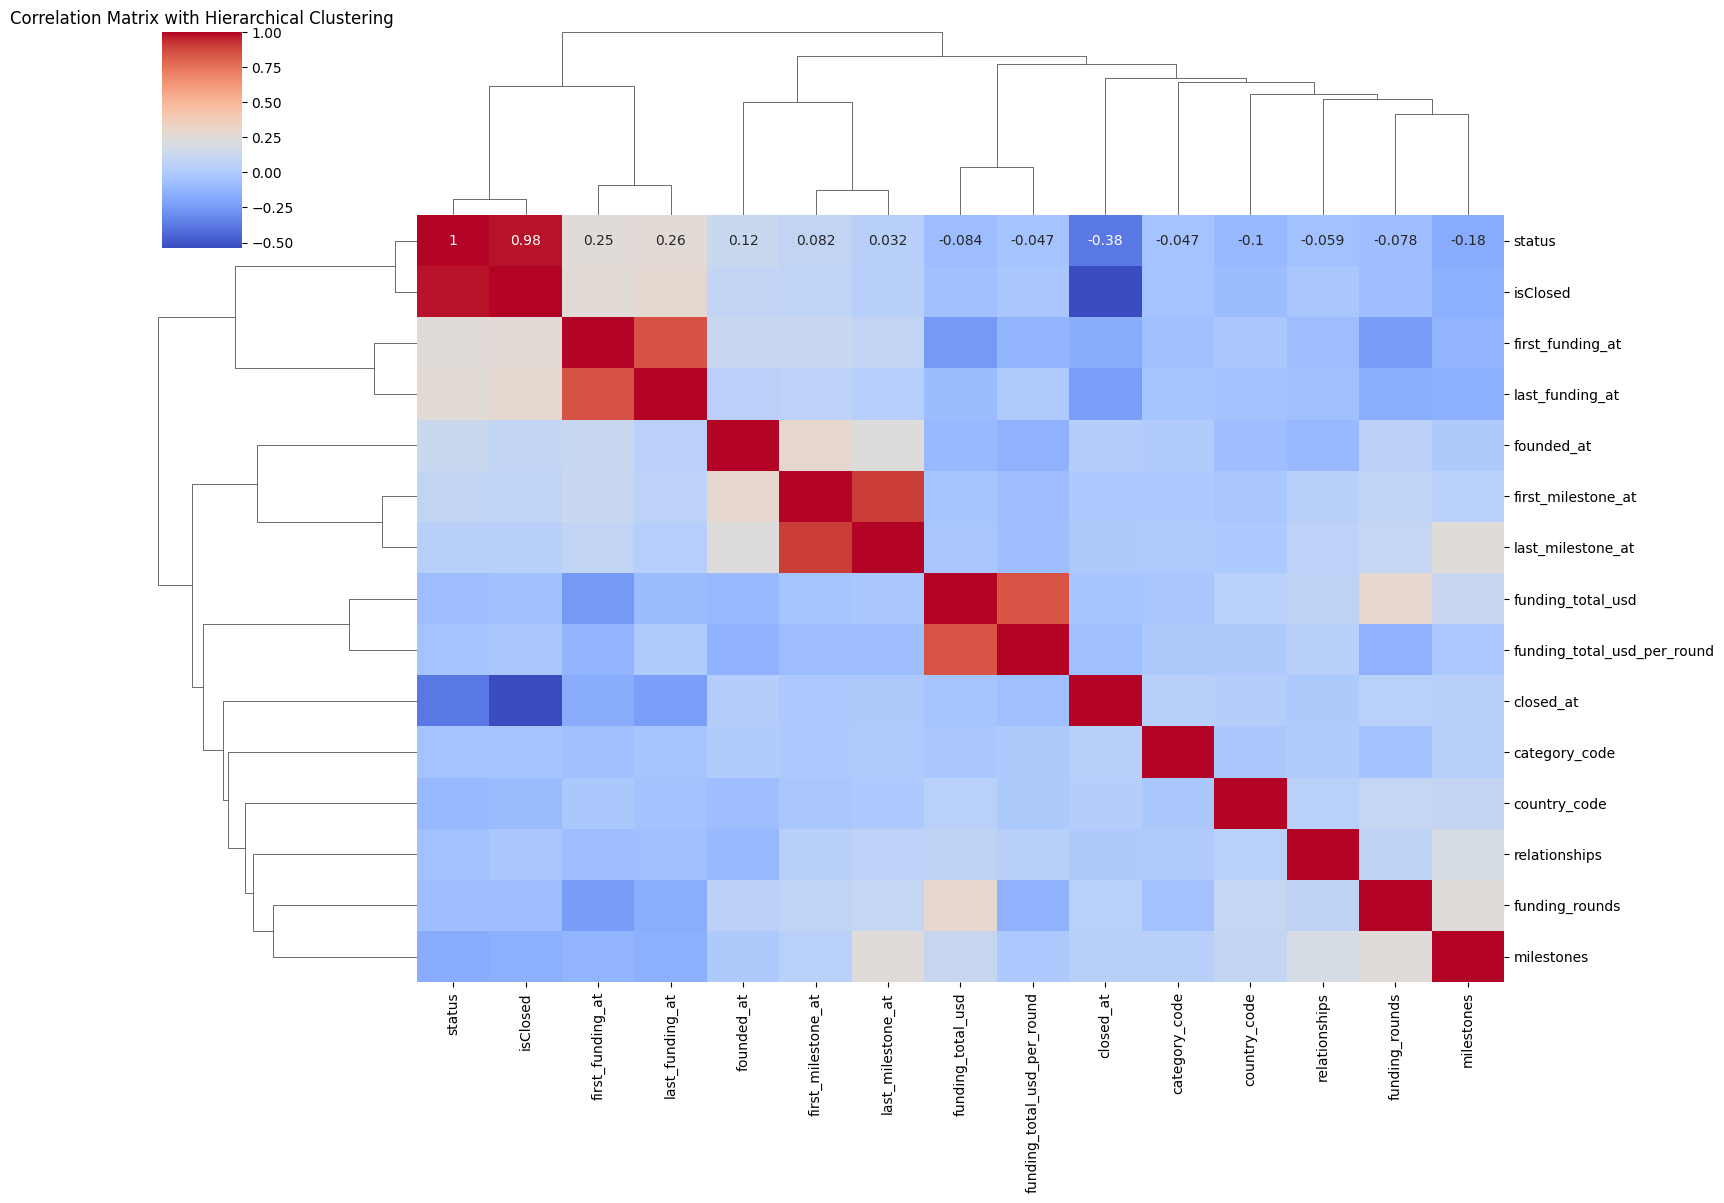

In [ ]:
correlation_matrix = df.corr()

plt.figure(figsize=(16, 12))
sns.clustermap(correlation_matrix, annot=True, cmap='coolwarm', figsize=(16, 12))
plt.title('Correlation Matrix with Hierarchical Clustering')
plt.show()

In [ ]:
X = df.drop(columns=['status'])
y = df['status']


model = RandomForestClassifier()
model.fit(X, y)


feature_importances = model.feature_importances_


features_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
features_df.sort_values(by='Importance', ascending=False, inplace=True)


print(features_df.head(10))

                        Feature  Importance
12                     isClosed    0.624091
2                     closed_at    0.193002
1                    founded_at    0.035185
11                relationships    0.022296
5               last_funding_at    0.021142
4              first_funding_at    0.019022
0                 category_code    0.016090
13  funding_total_usd_per_round    0.014233
7             funding_total_usd    0.012390
10                   milestones    0.012224


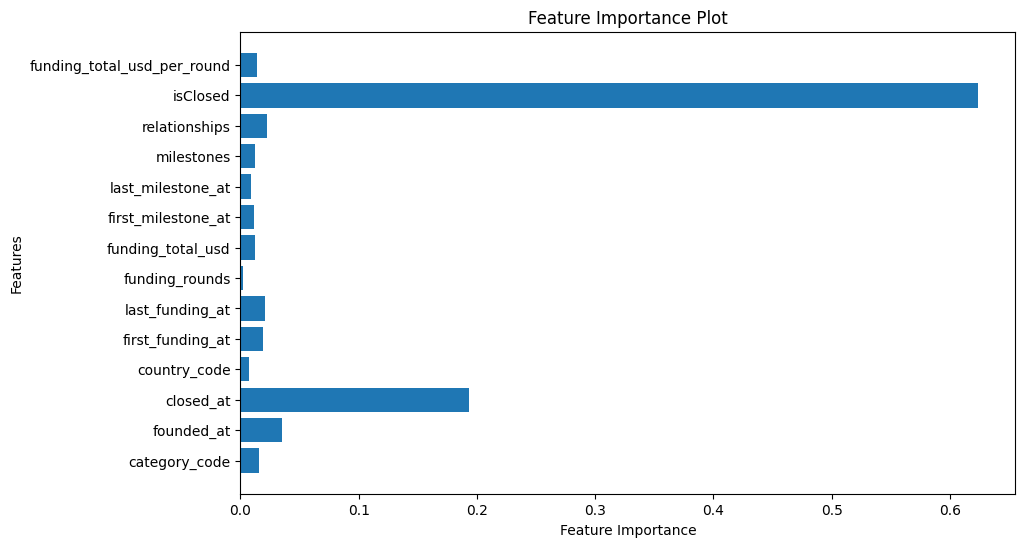

In [ ]:
plt.figure(figsize=(10, 6))
plt.barh(df.drop(columns=['status']).columns, feature_importances)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance Plot')
plt.show()

# Scaling

In [ ]:
scaler = MinMaxScaler()

In [ ]:
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

In [ ]:
X

,category_code,founded_at,closed_at,country_code,first_funding_at,last_funding_at,funding_rounds,funding_total_usd,first_milestone_at,last_milestone_at,milestones,relationships,isClosed,funding_total_usd_per_round
0,0.000000,0.938053,0.14,0.000442,0.962264,1.00000,0.0,0.161810,0.907407,0.925926,0.000000,0.000957,1.0,0.161810
1,0.097561,0.946903,0.14,0.089394,0.962264,1.00000,0.0,0.161810,0.907407,0.925926,0.000000,0.000957,1.0,0.161810
2,0.000000,0.946903,0.14,1.000000,0.962264,1.00000,0.0,0.161810,0.888889,0.888889,0.000000,0.000957,1.0,0.161810
3,1.000000,0.938053,0.14,1.000000,0.905660,0.90566,0.0,0.187058,0.888889,0.962963,0.333333,0.012440,0.0,0.187058
4,0.292683,0.946903,0.14,1.000000,0.962264,1.00000,0.0,0.161810,0.888889,0.888889,0.000000,0.001914,1.0,0.161810
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60270,0.170732,0.938053,0.14,1.000000,0.962264,1.00000,0.0,0.161810,0.981481,0.981481,0.166667,0.003828,1.0,0.161810
60271,0.756098,0.938053,0.14,1.000000,0.905660,0.90566,0.0,0.028049,0.981481,0.981481,0.000000,0.012440,1.0,0.028049
60272,0.121951,0.513274,0.14,1.000000,0.962264,1.00000,0.0,0.161810,0.962963,0.981481,0.333333,0.041148,1.0,0.161810
60273,0.804878,0.946903,0.14,1.000000,0.962264,1.00000,0.0,0.161810,0.907407,0.925926,0.000000,0.000000,1.0,0.161810


# Documentation

**Feature Selection**:
  - Perform correlation and feature importance scores to find the correlation between the features.
  - Using Random Forest Classifier to select the top 10 important features.

**Creation of new features**:
  -Already created 2 new features named "active_days" and "Is_closed".
  - Use interaction terms between "funding rounds" and "funding_total_usd" to create a new feature "funding_per_round".

**Encoding**:
  - Label encoding for "category_code" and "status"
  - Frequency encoding for "country_code"
  - Not used OneHot Encoding to prevent increase in dimentionality.

**Normalisation**:
  - Standardized all features using MinMaxScaler to ensure similar scales across all features.